### 1. Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### 2. Import the dataset

In [2]:
df = pd.read_csv('./Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [5]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


### 3. Identifying and handling the missing values

In [6]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

#### <font color='yellow'> Solution 1: Dropna</font>

In [7]:
df1 = df.copy()

In [8]:
print("Before:",df1.shape)

# drop rows with missing values
df1.dropna(inplace=True)

print("After:",df1.shape)

Before: (10, 4)
After: (8, 4)


#### <font color='yellow'> Solution 2: Fillna </font>

In [9]:
df2 = df.copy()

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
# List of numeric columns
numeric_columns = ['Age', 'Salary']

# Fill missing values with mean column values only for numeric columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())

print(df2.isnull().sum())

df2

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


#### <font color='yellow'> Solution 3: Scikit-Learn </font>

In [12]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [14]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


### 4. Encoding the categorical data

#### <font color='cyan'> Solution 1: ColumnTransformer </font>

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')

X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


#### <font color='cyan'> Solution 2: Pd.get_dummies() </font>

In [16]:
df2

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [17]:
pd.get_dummies(df2)

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.000000,72000.000000,True,False,False,True,False
1,27.000000,48000.000000,False,False,True,False,True
2,30.000000,54000.000000,False,True,False,True,False
3,38.000000,61000.000000,False,False,True,True,False
4,40.000000,63777.777778,False,True,False,False,True
5,35.000000,58000.000000,True,False,False,False,True
6,38.777778,52000.000000,False,False,True,True,False
7,48.000000,79000.000000,True,False,False,False,True
8,50.000000,83000.000000,False,True,False,True,False
9,37.000000,67000.000000,True,False,False,False,True


#### <font color='cyan'> Solution 3: LabelEncoder </font>

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [19]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### 5. Splitting the dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [21]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [22]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [23]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [24]:
print(y_test)

[0 1]


In [25]:
# for standard scaler
X_trainS = X_train.copy() 
X_testS = X_test.copy()

### 6. Feature Scaling

#### <font color='orange'> MinMax Scaler </font>
MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.


##### Formula

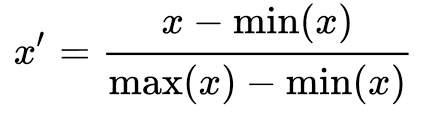

**Effect on Data Distribution:** Can alter the shape of the original distribution, particularly if outliers are present.

**Sensitivity to Outliers:** More sensitive to outliers because the scale is heavily influenced by the extreme maximum and minimum values.

**Usage:** Often used in algorithms that are sensitive to the scale of input data but do not assume any specific distribution, such as neural networks and distance-based algorithms like K-Nearest Neighbors.



In [26]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train[:, 3:] = mm.fit_transform(X_train[:, 3:])
X_test[:, 3:] = mm.transform(X_test[:, 3:])


In [27]:
print(X_train[:, 3:])

[[0.5120772946859904 0.11428571428571432]
 [0.5652173913043479 0.45079365079365075]
 [0.7391304347826089 0.6857142857142855]
 [0.4782608695652175 0.37142857142857144]
 [0.0 0.0]
 [0.9130434782608696 0.8857142857142857]
 [1.0 1.0]
 [0.34782608695652173 0.2857142857142856]]


In [28]:
print(X_test[:, 3:])

[[0.1304347826086958 0.17142857142857149]
 [0.43478260869565233 0.5428571428571427]]


#### <font color='orange'> Standard Scaler </font>
StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

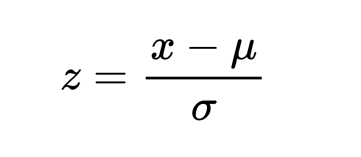

**Effect on Data Distribution:** Does not change the shape of the original distribution; it only standardizes the scale.

**Sensitivity to Outliers:** Less sensitive to outliers since it focuses on standard deviation.

**Usage:** Preferred for algorithms that assume normally distributed data, such as linear models and Gaussian Naive Bayes.

In [30]:
from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
X_trainS[:, 3:] = sta.fit_transform(X_trainS[:, 3:])
X_testS[:, 3:] = sta.transform(X_testS[:, 3:])


In [32]:
print(X_trainS[:, 3:])

[[-0.19159184384578545 -1.0781259408412425]
 [-0.014117293757057777 -0.07013167641635372]
 [0.566708506533324 0.633562432710455]
 [-0.30453019390224867 -0.30786617274297867]
 [-1.9018011447007988 -1.420463615551582]
 [1.1475343068237058 1.232653363453549]
 [1.4379472069688968 1.5749910381638885]
 [-0.7401495441200351 -0.5646194287757332]]


In [33]:
print(X_testS[:, 3:])

[[-1.4661817944830124 -0.9069571034860727]
 [-0.44973664397484414 0.2056403393225306]]
